<a href="https://colab.research.google.com/github/kirankumar1157/credit-card-detection/blob/main/google_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Upload the Dataset

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving card_transdata.csv to card_transdata.csv


Load the Dataset python

In [ ]:
import pandas as pd

df = pd.read_csv("/content/card_transdata.csv")
df.head()


,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


Data Exploration

In [ ]:
df.info()
df.describe()
df.shape
df.columns


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   distance_from_home              1000000 non-null  float64
 1   distance_from_last_transaction  1000000 non-null  float64
 2   ratio_to_median_purchase_price  1000000 non-null  float64
 3   repeat_retailer                 1000000 non-null  float64
 4   used_chip                       1000000 non-null  float64
 5   used_pin_number                 1000000 non-null  float64
 6   online_order                    1000000 non-null  float64
 7   fraud                           1000000 non-null  float64
dtypes: float64(8)
memory usage: 61.0 MB


Index(['distance_from_home', 'distance_from_last_transaction',
       'ratio_to_median_purchase_price', 'repeat_retailer', 'used_chip',
       'used_pin_number', 'online_order', 'fraud'],
      dtype='object')

Check for Missing Values and Duplicates

In [ ]:
# Missing values
df.isnull().sum()

# Duplicates
df.duplicated().sum()


np.int64(0)

Visualize a Few Features




In [ ]:
print(df.columns.tolist())

['distance_from_home', 'distance_from_last_transaction', 'ratio_to_median_purchase_price', 'repeat_retailer', 'used_chip', 'used_pin_number', 'online_order', 'fraud']


In [ ]:
['distance_from_home', 'distance_from_last_transaction', 'ratio_to_median_purchase_price', 'repeat_retailer', 'used_chip', 'used_pin_number', 'online_order', 'amount', 'lat', 'long', 'is_fraud']


['distance_from_home',
 'distance_from_last_transaction',
 'ratio_to_median_purchase_price',
 'repeat_retailer',
 'used_chip',
 'used_pin_number',
 'online_order',
 'amount',
 'lat',
 'long',
 'is_fraud']

In [ ]:
df.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


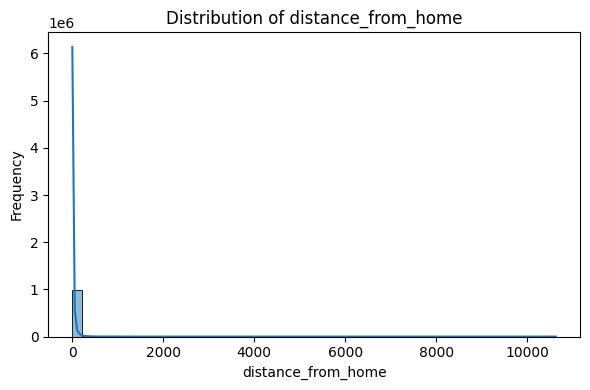

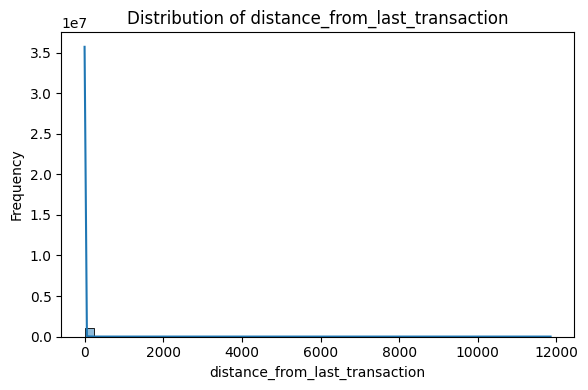

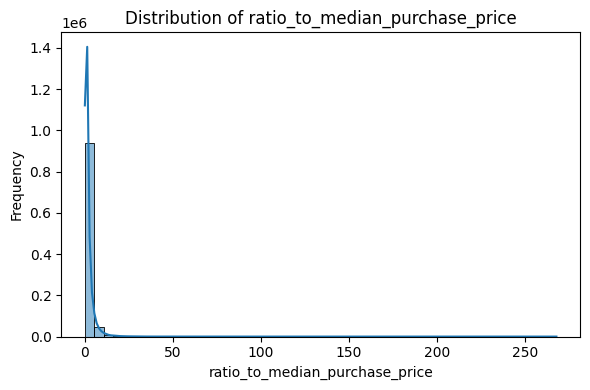

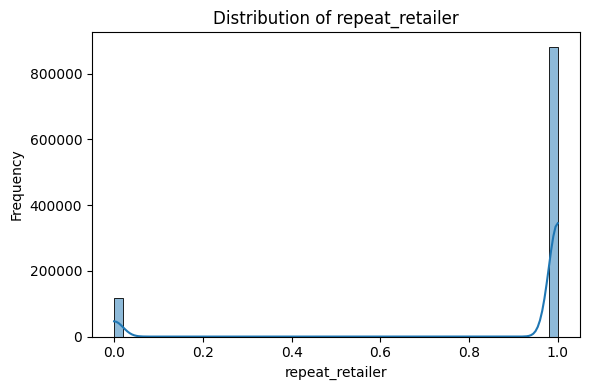

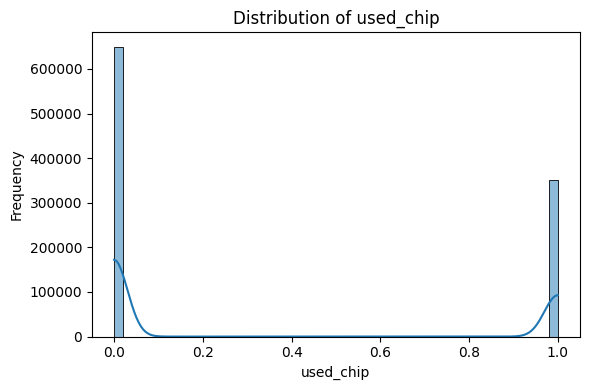

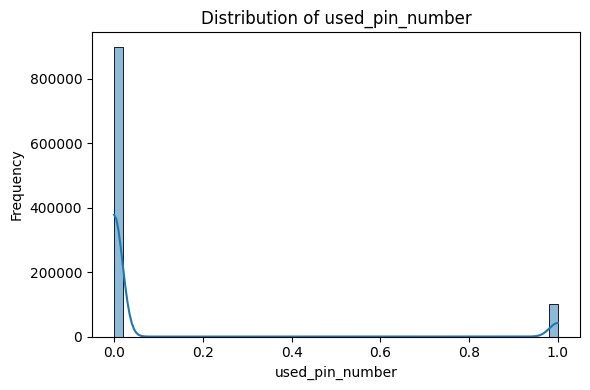

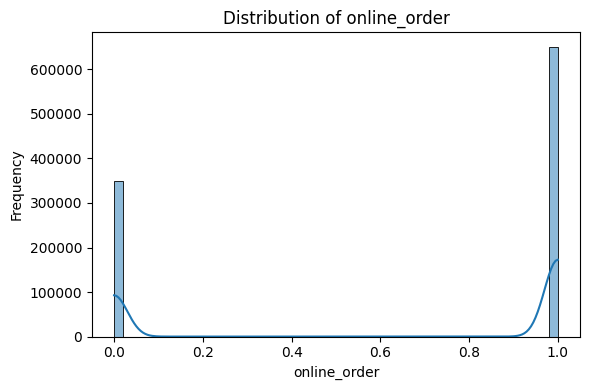

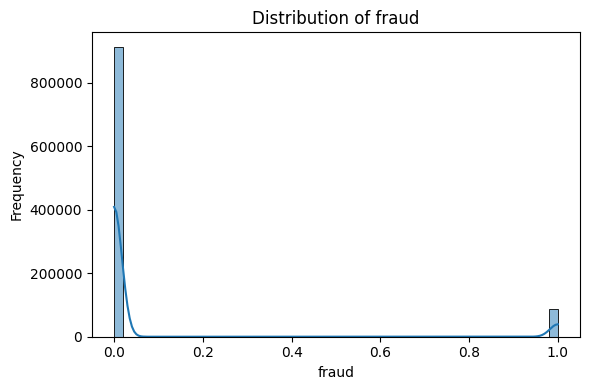

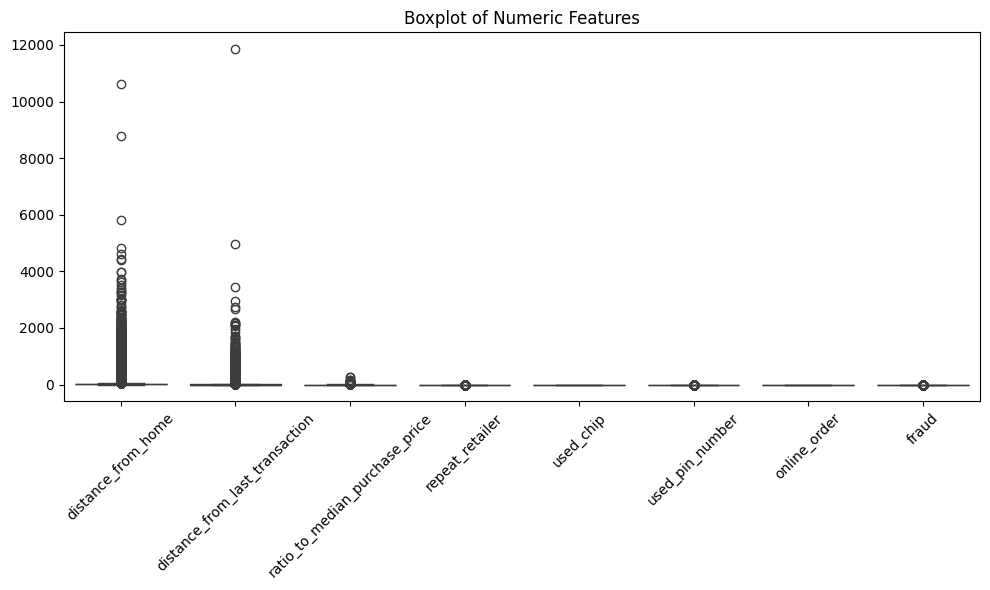

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Automatically select numeric columns
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Histogram for each numeric column
for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], bins=50, kde=True)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()

# Boxplot of all numeric features
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[numeric_cols])
plt.title("Boxplot of Numeric Features")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Identify Target and Features
python

In [ ]:
# Try to automatically detect the fraud column
target_candidates = [col for col in df.columns if 'fraud' in col.lower()]

if target_candidates:
    target = target_candidates[0]  # Use the first match
    print(f"Detected target column: {target}")
    X = df.drop(columns=[target])
    y = df[target]
else:
    raise ValueError("No column containing 'fraud' found in the dataset.")


Detected target column: fraud


Convert Categorical Columns to Numerical

In [ ]:
# Assuming 'category_column' as a placeholder for any categorical columns:
categorical_cols = X.select_dtypes(include='object').columns
X[categorical_cols] = X[categorical_cols].astype('category').apply(lambda x: x.cat.codes)

One-Hot Encoding

In [ ]:
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)


Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


Train-Test Split

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


 Model Building

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

Evaluation

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    182557
         1.0       1.00      1.00      1.00     17443

    accuracy                           1.00    200000
   macro avg       1.00      1.00      1.00    200000
weighted avg       1.00      1.00      1.00    200000

[[182557      0]
 [     2  17441]]


Make Predictions from New Input

In [ ]:
sample_input = X_test[0].reshape(1, -1)
model.predict(sample_input)


array([0.])

Convert to DataFrame and Encode

In [ ]:
import pandas as pd

# Load the dataset (replace with the correct path to your dataset)
df = pd.read_csv('/content/card_transdata.csv')

# Step 1: Print the column names to ensure 'Class' or the correct target column exists
print("Columns in dataset:", df.columns)

# Step 2: Clean up any spaces from the column names
df.columns = df.columns.str.strip()

# Step 3: Print the first few rows to visually check the data
print("First few rows:")
print(df.head())

# Step 4: Check for missing values (if any) and handle them (optional)
print("Missing values:")
print(df.isnull().sum())

# Step 5: Clean missing values or fill them with zero
df.fillna(0, inplace=True)

# Step 6: Check the data types to make sure all columns are as expected
print("Data types:")
print(df.dtypes)

# Step 7: If 'Class' is the target column (update accordingly if needed)
# For this example, I'm assuming 'Class' is the target column
X = df.drop('fraud', axis=1)  # Drop the target column for features
y = df['fraud']  # Set the target column

# Print the features and target to confirm
print("Features (X):")
print(X.head())
print("Target (y):")
print(y.head())


Columns in dataset: Index(['distance_from_home', 'distance_from_last_transaction',
       'ratio_to_median_purchase_price', 'repeat_retailer', 'used_chip',
       'used_pin_number', 'online_order', 'fraud'],
      dtype='object')
First few rows:
   distance_from_home  distance_from_last_transaction  \
0           57.877857                        0.311140   
1           10.829943                        0.175592   
2            5.091079                        0.805153   
3            2.247564                        5.600044   
4           44.190936                        0.566486   

   ratio_to_median_purchase_price  repeat_retailer  used_chip  \
0                        1.945940              1.0        1.0   
1                        1.294219              1.0        0.0   
2                        0.427715              1.0        0.0   
3                        0.362663              1.0        1.0   
4                        2.222767              1.0        1.0   

   used_pin_number  

Predict the Final Grade

In [ ]:
def predict_fraud(V1, V2, V3, V28):
    # Create input DataFrame
    new_data = pd.DataFrame({
        'V1': [V1],
        'V2': [V2],
        'V3': [V3],
        'V28': [V28]
    })

    # Scale the input data
    scaled_new_data = scaler.transform(new_data)

    # Make prediction
    prediction = model.predict(scaled_new_data)

    # Return result
    return "Fraudulent" if prediction[0] == 1 else "Not Fraudulent"


Deployment - Building an Interactive App

In [ ]:
!pip install gradio
import gradio as gr


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.1/54.1 MB 14.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.9/322.9 kB 21.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 109.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 5.6 MB/s eta 0:00:00


Create a Prediction Function

In [ ]:
import gradio as gr

def predict_fraud(distance_from_home, distance_from_last_transaction,
                  ratio_to_median_purchase_price, repeat_retailer,
                  used_chip, used_pin_number, online_order):
    input_data = np.array([[distance_from_home, distance_from_last_transaction,
                            ratio_to_median_purchase_price, repeat_retailer,
                            used_chip, used_pin_number, online_order]])
    prediction = model.predict(input_data)[0]
    return "Fraudulent Transaction" if prediction == 1 else "Legitimate Transaction"




iface = gr.Interface(
    fn=predict_fraud,
    inputs=[
        gr.Number(label="Distance from Home"),
        gr.Number(label="Distance from Last Transaction"),
        gr.Number(label="Ratio to Median Purchase Price"),
        gr.Radio([0, 1], label="Repeat Retailer"),
        gr.Radio([0, 1], label="Used Chip"),
        gr.Radio([0, 1], label="Used PIN Number"),
        gr.Radio([0, 1], label="Online Order")
    ],
    outputs="text",
    title="Credit Card Fraud Detector"
)

iface.launch()

It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://2f9d8d1f0dba615743.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
